# Feature Engineering: Feature Creation

### Read in text

In [25]:
import pandas as pd

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

### Create feature for text message length

In [26]:
data['body_len']=data['body_text'].apply(lambda x: len(x)-x.count(" "))
data.head()

,label,body_text,body_len
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
1,ham,"Nah I don't think he goes to usf, he lives aro...",49
2,ham,Even my brother is not like to speak with me. ...,62
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135


### Create feature for % of text that is punctuation

In [27]:
import string
def fn(text):
    count=sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100
data['puncts%']=data['body_text'].apply(lambda x: fn(x))
data.head()


,label,body_text,body_len,puncts%
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
1,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
2,ham,Even my brother is not like to speak with me. ...,62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135,4.4


### Evaluate created features

In [28]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

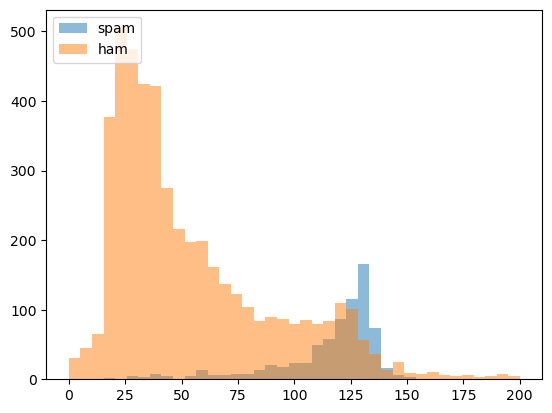

In [37]:
bins=np.linspace(0,200,40)

pyplot.hist(data[data['label']=='spam']['body_len'], bins, alpha=0.5, label='spam')
pyplot.hist(data[data['label']=='ham']['body_len'], bins, alpha=0.5, label='ham')
pyplot.legend(loc='upper left')
pyplot.show()


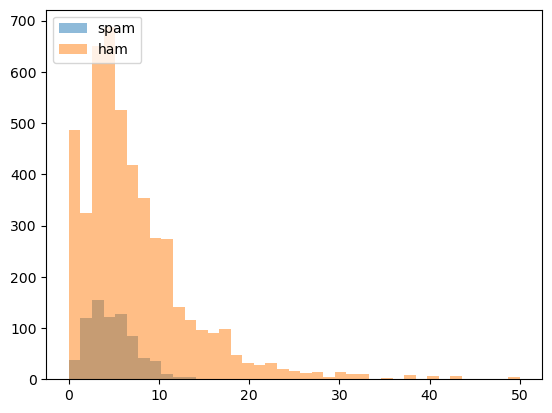

In [39]:
bins=np.linspace(0,50,40)

pyplot.hist(data[data['label']=='spam']['puncts%'], bins, alpha=0.5, label='spam')
pyplot.hist(data[data['label']=='ham']['puncts%'], bins, alpha=0.5, label='ham')
pyplot.legend(loc='upper left')
pyplot.show()
